In [1]:
pip install -U --no-cache-dir pymoo

Requirement already up-to-date: pymoo in c:\users\seungwoo\anaconda3\lib\site-packages (0.4.2.1)
Note: you may need to restart the kernel to use updated packages.


In [45]:
H = np.array([[7.54,0],[7.54,7.21],[14.14,0],[14.14,7.58]])
H2 = np.matrix([[7.54,0],[7.54,7.21],[14.14,0],[14.14,7.58]])
x = np.array([7.54,4.8])
d = x-H
d = np.multiply(d,d)
d = np.sqrt(d.sum(axis=1))
d[0] = d[0] + np.random.normal(bias,0,1)
d[1] = d[1] + np.random.normal(bias,0,1)
d[2] = d[2] + np.random.normal(bias,0,1)
d[3] = d[3] + np.random.normal(bias,0,1)
zd = np.array([d[0],d[1],d[2],d[3]])
x2 = np.array([10.54,4.8])
d = x2-H
d = np.multiply(d,d)
d = np.sqrt(d.sum(axis=1))
d[0] = d[0] + np.random.normal(bias,0,1)
d[1] = d[1] + np.random.normal(bias,0,1)
d[2] = d[2] + np.random.normal(bias,0,1)
d[3] = d[3] + np.random.normal(bias,0,1)
zd2 = np.array([d[0],d[1],d[2],d[3]])

x_hat = tri(zd,H2)
x_hat = x_hat.T+H[0]
x_hat_2 = tri(zd2,H2)
x_hat_2 = x_hat_2.T+H[0]

In [47]:
import numpy as np
from pymoo.util.misc import stack
from pymoo.model.problem import Problem

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([0,0]),
                         xu=np.array([15,15]),
                         elementwise_evaluation=True)

    def _evaluate(self, x, x2, out, *args, **kwargs):
        f1 = x[0]**2 + x[1]**2
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


elementwise_problem = MyProblem()

In [48]:
import numpy as np
from pymoo.model.problem import FunctionalProblem
objs = [
    lambda x: x[0]**2 + x[1]**2,
    lambda x: (x[0]-1)**2 + x[1]**2
]

constr_ieq = [
    lambda x: 2*(x[0]-0.1) * (x[0]-0.9) / 0.18,
    lambda x: - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8
]

functional_problem = FunctionalProblem(2,
                                       objs,
                                       constr_ieq=constr_ieq,
                                       xl=np.array([-2,-2]),
                                       xu=np.array([2,2]))

In [49]:
from pymoo.util.misc import stack

def func_pf(flatten=True, **kwargs):
        f1_a = np.linspace(0.1**2, 0.4**2, 100)
        f2_a = (np.sqrt(f1_a) - 1)**2

        f1_b = np.linspace(0.6**2, 0.9**2, 100)
        f2_b = (np.sqrt(f1_b) - 1)**2

        a, b = np.column_stack([f1_a, f2_a]), np.column_stack([f1_b, f2_b])
        return stack(a, b, flatten=flatten)

def func_ps(flatten=True, **kwargs):
        x1_a = np.linspace(0.1, 0.4, 50)
        x1_b = np.linspace(0.6, 0.9, 50)
        x2 = np.zeros(50)

        a, b = np.column_stack([x1_a, x2]), np.column_stack([x1_b, x2])
        return stack(a,b, flatten=flatten)

In [50]:
import numpy as np
from pymoo.util.misc import stack
from pymoo.model.problem import Problem

class MyTestProblem(MyProblem):

    def _calc_pareto_front(self, *args, **kwargs):
        return func_pf(**kwargs)

    def _calc_pareto_set(self, *args, **kwargs):
        return func_ps(**kwargs)

test_problem = MyTestProblem()

In [51]:
from pymoo.model.problem import FunctionalProblem

functional_test_problem = FunctionalProblem(2,
                                            objs,
                                            constr_ieq=constr_ieq,
                                            xl=-2,
                                            xu=2,
                                            func_pf=func_pf,
                                            func_ps=func_ps
                                            )

In [52]:
problem = test_problem

In [53]:
from pymoo.factory import get_problem
zdt1 = get_problem("zdt1")

In [54]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

In [55]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 40)

In [56]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

TypeError: _evaluate() missing 1 required positional argument: 'out'

In [57]:
import copy

# perform a copy of the algorithm to ensure reproducibility
obj = copy.deepcopy(algorithm)

# let the algorithm know what problem we are intending to solve and provide other attributes
obj.setup(problem, termination=termination, seed=1)

# until the termination criterion has not been met
while obj.has_next():

    # perform an iteration of the algorithm
    obj.next()

    # access the algorithm to print some intermediate outputs
    print(f"gen: {obj.n_gen} n_nds: {len(obj.opt)} constr: {obj.opt.get('CV').min()} ideal: {obj.opt.get('F').min(axis=0)}")

# finally obtain the result object
result = obj.result()

TypeError: _evaluate() missing 1 required positional argument: 'out'

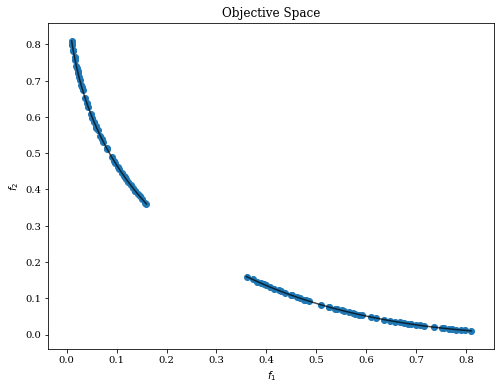

In [58]:
from pymoo.visualization.scatter import Scatter

# get the pareto-set and pareto-front for plotting
ps = problem.pareto_set(use_cache=False, flatten=False)
pf = problem.pareto_front(use_cache=False, flatten=False)

# Design Space
plot = Scatter(title = "Design Space", axis_labels="x")
plot.add(res.X, s=30, facecolors='none', edgecolors='r')
if ps is not None:
    plot.add(ps, plot_type="line", color="black", alpha=0.7)
plot.do()
plot.apply(lambda ax: ax.set_xlim(-0.5, 1.5))
plot.apply(lambda ax: ax.set_ylim(-2, 2))
plot.show()

# Objective Space
plot = Scatter(title = "Objective Space")
plot.add(res.F)
if pf is not None:
    plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.show()

In [59]:
n_evals = []    # corresponding number of function evaluations\
F = []          # the objective space values in each generation
cv = []         # constraint violation in each generation


# iterate over the deepcopies of algorithms
for algorithm in res.history:

    # store the number of function evaluations
    n_evals.append(algorithm.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algorithm.opt

    # store the least contraint violation in this generation
    cv.append(opt.get("CV").min())

    # filter out only the feasible and append
    feas = np.where(opt.get("feasible"))[0]
    _F = opt.get("F")[feas]
    F.append(_F)

TypeError: 'NoneType' object is not iterable

First feasible solution found after 40 evaluations


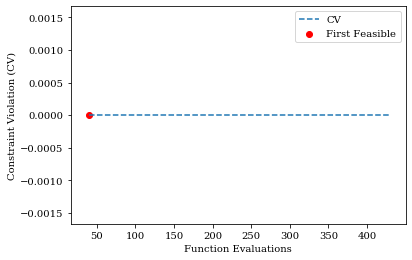

In [37]:
import matplotlib.pyplot as plt

k = min([i for i in range(len(cv)) if cv[i] <= 0])
first_feas_evals = n_evals[k]
print(f"First feasible solution found after {first_feas_evals} evaluations")

plt.plot(n_evals, cv, '--', label="CV")
plt.scatter(first_feas_evals, cv[k], color="red", label="First Feasible")
plt.xlabel("Function Evaluations")
plt.ylabel("Constraint Violation (CV)")
plt.legend()
plt.show()

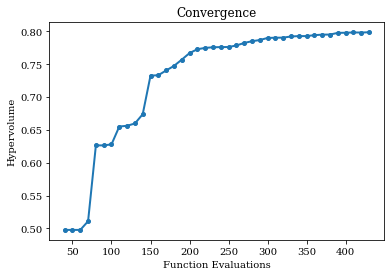

In [38]:
import matplotlib.pyplot as plt
from pymoo.performance_indicator.hv import Hypervolume

# MODIFY - this is problem dependend
ref_point = np.array([1.0, 1.0])

# create the performance indicator object with reference point
metric = Hypervolume(ref_point=ref_point, normalize=False)

# calculate for each generation the HV metric
hv = [metric.calc(f) for f in F]

# visualze the convergence curve
plt.plot(n_evals, hv, '-o', markersize=4, linewidth=2)
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()

In [39]:
pf = problem.pareto_front(flatten=True, use_cache=False)

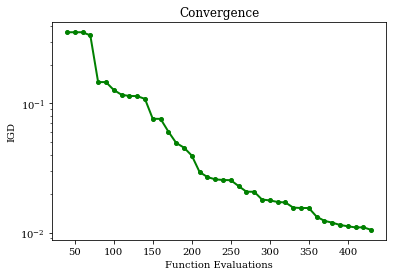

In [40]:
import matplotlib.pyplot as plt
from pymoo.performance_indicator.igd import IGD

if pf is not None:

    # for this test problem no normalization for post prcessing is needed since similar scales
    normalize = False

    metric = IGD(pf=pf, normalize=normalize)

    # calculate for each generation the HV metric
    igd = [metric.calc(f) for f in F]

    # visualze the convergence curve
    plt.plot(n_evals, igd, '-o', markersize=4, linewidth=2, color="green")
    plt.yscale("log")          # enable log scale if desired
    plt.title("Convergence")
    plt.xlabel("Function Evaluations")
    plt.ylabel("IGD")
    plt.show()

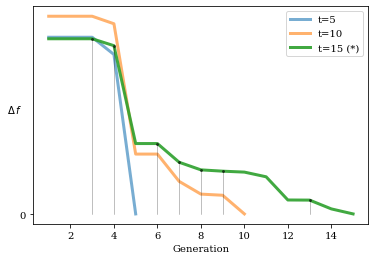

In [41]:
from pymoo.util.running_metric import RunningMetric

running = RunningMetric(delta_gen=5,
                        n_plots=3,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history[:15]:
    running.notify(algorithm)

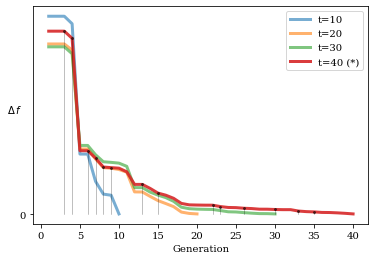

In [42]:
from pymoo.util.running_metric import RunningMetric

running = RunningMetric(delta_gen=10,
                        n_plots=4,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history:
    running.notify(algorithm)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  2.11633E+01 |       2 |            - |            -
    2 |     200 |  0.00000E+00 |  1.235931783 |       4 |  0.328903303 |        ideal
    3 |     300 |  0.00000E+00 |  0.00000E+00 |       7 |  0.140735357 |        ideal
    4 |     400 |  0.00000E+00 |  0.00000E+00 |      12 |  0.034354578 |        ideal
    5 |     500 |  0.00000E+00 |  0.00000E+00 |      17 |  0.025983976 |            f
    6 |     600 |  0.00000E+00 |  0.00000E+00 |      25 |  0.052813168 |        ideal
    7 |     700 |  0.00000E+00 |  0.00000E+00 |      37 |  0.006495846 |            f
    8 |     800 |  0.00000E+00 |  0.00000E+00 |      57 |  0.019099424 |        ideal
    9 |     900 |  0.00000E+00 |  0.00000E+00 |      71 |  0.001772657 |            f
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |      89 |  0.030528064 |        nadir
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |     10

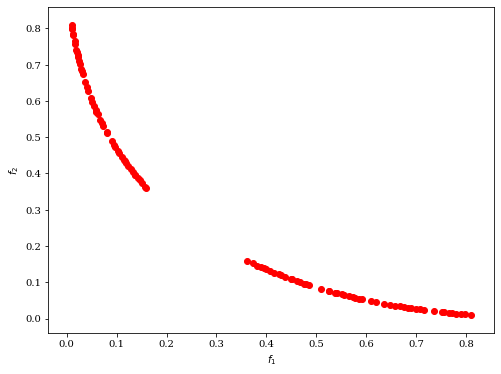

In [43]:
import numpy as np

from pymoo.algorithms.nsga2 import NSGA2
from pymoo.model.problem import Problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2, -2]),
                         xu=np.array([2, 2]),
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[0] ** 2 + x[1] ** 2
        f2 = (x[0] - 1) ** 2 + x[1] ** 2

        g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
        g2 = - 20 * (x[0] - 0.4) * (x[0] - 0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=True,
               seed=1)

plot = Scatter()
plot.add(res.F, color="red")
plot.show()